In [1]:
import multiprocessing
import math
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio import Phylo
from featureUtils import BED_file_to_features, feature_to_seq
from sklearn.cluster import AgglomerativeClustering
from Bio.Phylo.PhyloXML import Clade, Phylogeny, Sequence, Phyloxml
from treeFromClusters import features_to_leaves, new_clade, new_phylogeny
from hierarchical_clustering import hierarchical_clustering, build_phylogeny, sort_phylogeny_by_leaf_names, get_clades_by_level, get_clustering_matrices
from iterativeClustering import clusterings_with_hors
from compare_phylogenies import phylogenies_equal
from tree_to_hors import get_clades_by_height


In [2]:
multiprocessing.cpu_count()

10

In [3]:
references = {seq.id : seq for seq in SeqIO.parse("./data/monomers/chr2_centromere_plus2Mb.fasta", "fasta")}

In [4]:
monomers_as_features = BED_file_to_features("./data/monomers/chr2_StringDecMon2extr_noMorgante.bed")

In [5]:
# sample_size = len(monomers_as_features)
sample_size = 10

In [6]:
monomers_as_features = monomers_as_features[0:sample_size]

In [7]:
monomers_as_seqs = [feature_to_seq(feature, references) for feature in monomers_as_features]

In [8]:
len(monomers_as_seqs)

10

In [9]:
dist_matrix = np.load('data/dist_matrix.npy')

In [10]:
dist_matrix = dist_matrix[0:sample_size,0:sample_size]

In [11]:
simple_phylogeny = hierarchical_clustering(dist_matrix=dist_matrix)

In [12]:
phylogeny = build_phylogeny(simple_phylogeny=simple_phylogeny, features=monomers_as_features, sort=False)

In [13]:
phyloXml, hor_tree_root, clusterings = clusterings_with_hors(monomer_seqs=monomers_as_seqs, monomers_as_features=monomers_as_features, distance_matrix=dist_matrix, min_len_loop=1, min_loop_reps=5, max_len_loop=1000)

Start of clusterings_with_hors
Reorder
Reorder all
Indexes built, now reordering lists...
Lists reordered, now reordering matrix...
Matrix reordered
merge_clusters with distance as (10, 10), clusters as (), and max distance 6.0
adjacency matrix sparsity is 0.88
merge_clusters with distance as (9, 9), clusters as (9, 10), and max distance 7.0
adjacency matrix sparsity is 0.8641975308641976
merge_clusters with distance as (8, 8), clusters as (8, 10), and max distance 8.0
adjacency matrix sparsity is 0.84375
merge_clusters with distance as (7, 7), clusters as (7, 10), and max distance 10.0
adjacency matrix sparsity is 0.7755102040816326
merge_clusters with distance as (5, 5), clusters as (5, 10), and max distance 11.0
adjacency matrix sparsity is 0.72
merge_clusters with distance as (4, 4), clusters as (4, 10), and max distance 13.0
adjacency matrix sparsity is 0.625
merge_clusters with distance as (3, 3), clusters as (3, 10), and max distance 16.0
adjacency matrix sparsity is 0.444444444

/Users/miguel/git/dna-repeat-discovery/env/lib/python3.11/site-packages/Bio/Phylo/PhyloXML.py:985: PhyloXMLWarning: String monomer_clade_seq doesn't match the given regexp
  _check_str(ref, self.re_ref.match)


In [14]:
my_phylogeny = phyloXml.phylogenies[0]

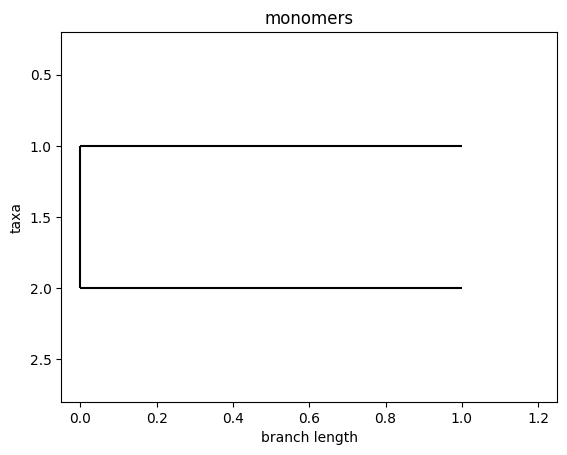

In [15]:
Phylo.draw(phylogeny)

In [16]:
sort_phylogeny_by_leaf_names(my_phylogeny)

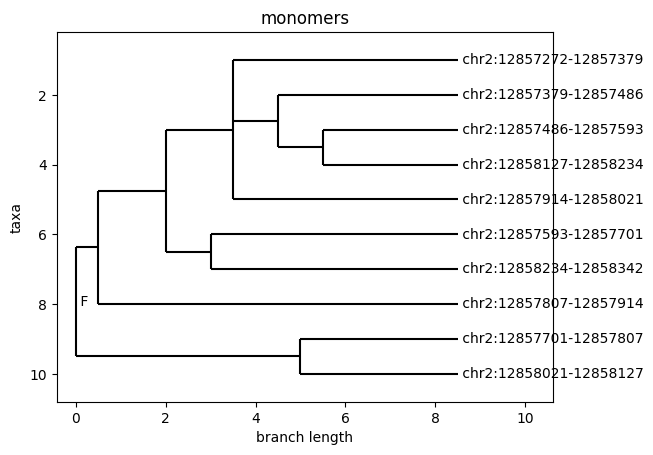

In [17]:
Phylo.draw(my_phylogeny)

In [18]:
phylogenies_equal(phylogeny, my_phylogeny)

False

In [19]:
clades_by_height, children_num_by_height = get_clades_by_level(simple_phylogeny)

In [20]:
a = []
b = []
a ==b

True

In [21]:
a.extend([3])
a== b

False

In [22]:
[[]] * 6

[[], [], [], [], [], []]

In [23]:
expansion_matrices_by_height = get_clustering_matrices(simple_phylogeny)

In [24]:
clades_by_height

[[2, 8, 4, 7], [11, 10], [17]]

In [25]:
expansion_matrices_by_height

[array([[ True,  True, False, False],
        [False, False,  True,  True]]),
 array([[ True,  True]])]